In [87]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from scipy.stats import zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# reading the Data Set
nba_df = pd.read_csv('nba_logreg.csv')

In [89]:
nba_df.head(10)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0.0


In [90]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1329 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 220.0+ KB


In [91]:
nba_df = nba_df.drop('Name', axis=1)
nba_df = nba_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [92]:
nba_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GP,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.0,82.0
MIN,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.9,40.9
PTS,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.8,28.2
FGM,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.4,10.2
FGA,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.5,19.8
FG%,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.9,73.7
3P Made,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.4,2.3
3PA,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.2,6.5
3P%,1340.0,19.333507,15.959406,0.0,0.000,22.40,32.5,100.0
FTM,1340.0,1.297687,0.987246,0.0,0.600,1.00,1.6,7.7


In [93]:
nba_df.groupby("TARGET_5Yrs").count()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
TARGET_5Yrs,,,,,,,,,,,,,,,,,,,
0.0,509,509,509,509,509,509,509,509,509,509,509,509,509,509,509,509,509,509,509
1.0,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831


In [94]:
features_df = nba_df.drop("TARGET_5Yrs", axis =1)
target_df = nba_df["TARGET_5Yrs"]

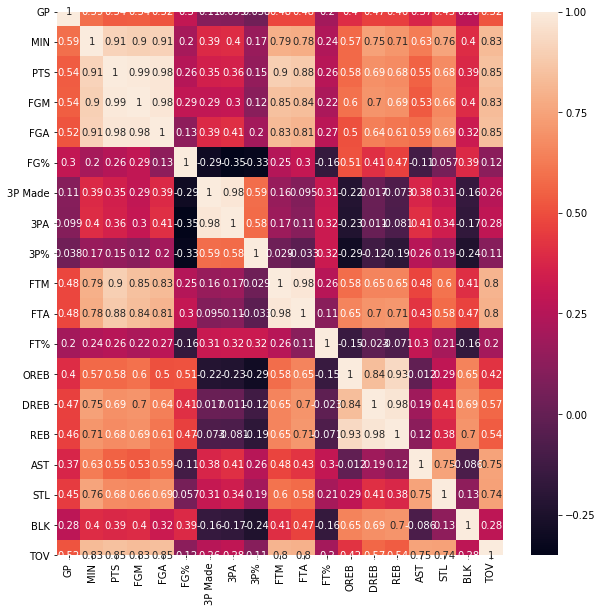

In [95]:
#correlation table to drop unimportant columns
plt.figure(figsize=(10,10))
sns.heatmap(features_df.corr(), annot=True)

In [96]:
# Varian Inflattion Factor


X= features_df
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

      VIF Factor features
0      22.214568       GP
1      85.867434      MIN
2   12204.512253      PTS
3    7336.961693      FGM
4     298.440925      FGA
5      70.675597      FG%
6      83.483957  3P Made
7      64.234829      3PA
8       4.163411      3P%
9     625.674200      FTM
10    167.656331      FTA
11     70.133152      FT%
12    668.455973     OREB
13   2436.269154     DREB
14   5448.709357      REB
15     10.761092      AST
16     11.566889      STL
17      3.861048      BLK
18     29.454986      TOV


In [97]:
features_df = features_df.drop(["PTS","FGA","FGM","FTM","3P Made","REB"],axis=1)

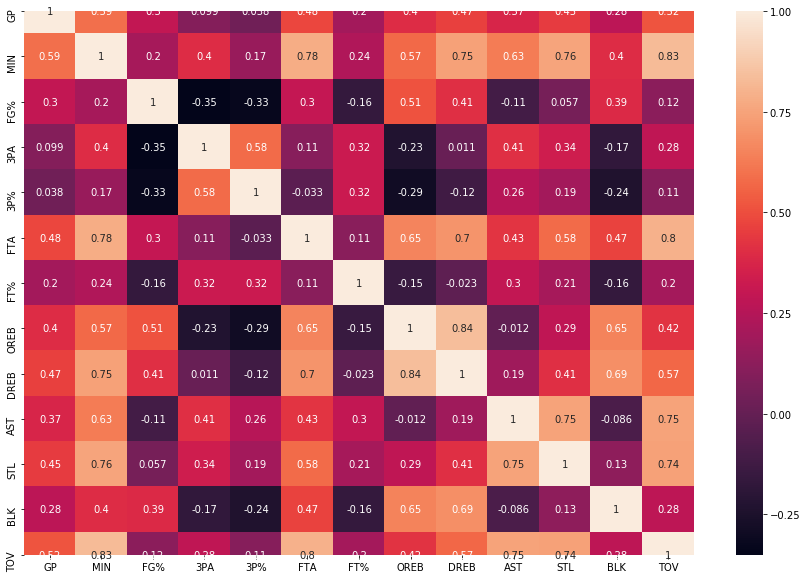

In [98]:
#correlation table to drop unimportant columns
plt.figure(figsize=(15,10))
sns.heatmap(features_df.corr(), annot=True,fmt='.2g')
plt.show()

In [99]:
#features_df.info()

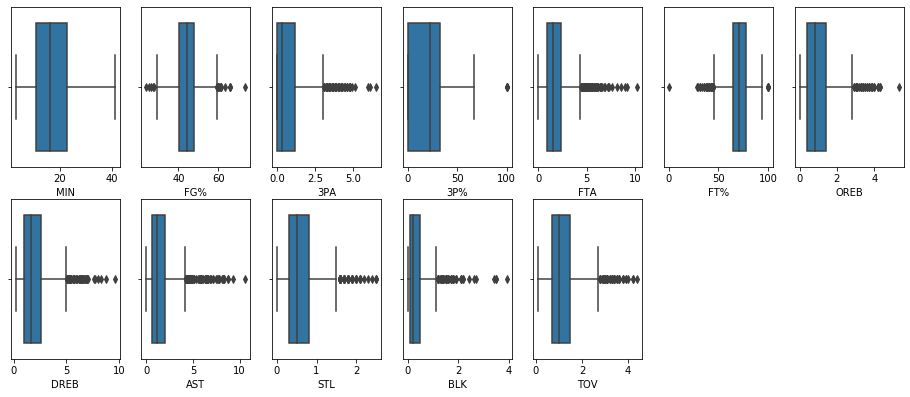

In [100]:
plt.figure(figsize=(16,10))
n= features_df.shape[1] 
for i in range(1,n):
    plt.subplot(3,7,i)
    sns.boxplot(features_df.iloc[:,i])

In [101]:
features_df["OREB"] = features_df["OREB"]**(1/2)
#features_df["3P Made"] = features_df["3P Made"]**(1/2)
features_df["3PA"] = features_df["3PA"]**(1/2)
features_df["3P%"] = features_df["3P%"]**(1/2)
features_df["STL"] = features_df["STL"]**(1/2)
features_df["FTA"] = features_df["FTA"]**(1/3)
features_df["AST"] = features_df["AST"]**(1/3)
features_df["BLK"] = features_df["BLK"]**(1/3)
features_df["TOV"] = features_df["TOV"]**(1/4)

features_df["FT%"] = features_df["FT%"]**2

features_df["DREB"] = np.log10(features_df["DREB"])
#features_df["FGM"] = np.log10(features_df["FGM"])
#features_df["FGA"] = np.log10(features_df["FGA"])



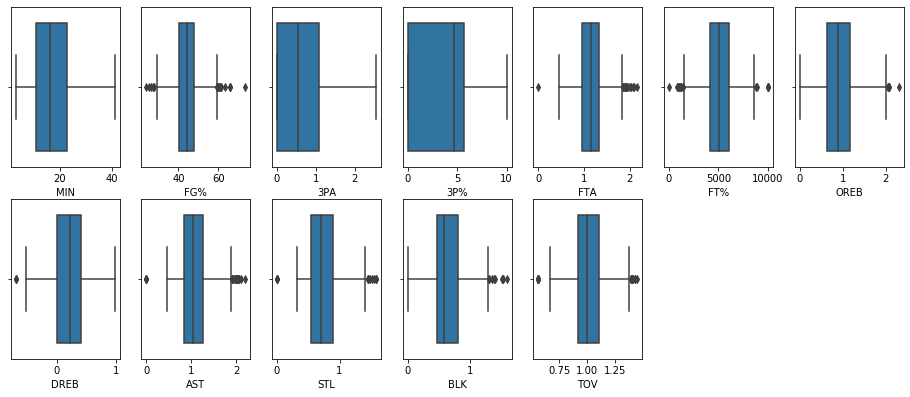

In [102]:
plt.figure(figsize=(16,10))
n= features_df.shape[1]
for i in range(1,n):
    plt.subplot(3,7,i)
    sns.boxplot(features_df.iloc[:,i])
plt.show()

In [103]:
#features_df = features_df.apply(zscore)

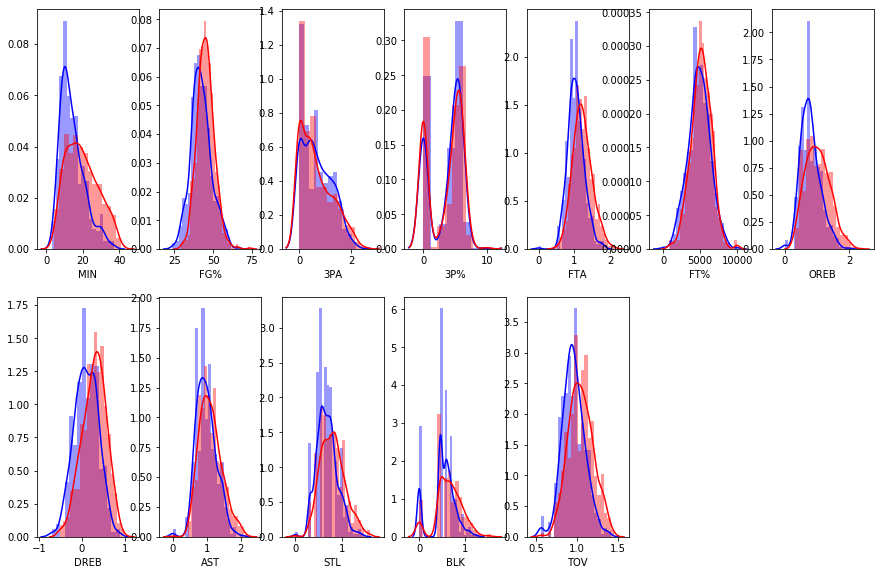

In [104]:
plt.figure(figsize=(15,15))
n= features_df.shape[1]
for i in range(1,n):
    plt.subplot(3,7,i)
    sns.distplot(features_df[nba_df['TARGET_5Yrs'] == 0].iloc[:,i], color = 'b')
    sns.distplot(features_df[nba_df['TARGET_5Yrs'] == 1].iloc[:,i], color = 'r')

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_df= sc.fit_transform(features_df)

In [106]:
# spliting the features data into train and test

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=1)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test,y_test))
y_predict = lr.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.6902985074626866
[[ 58  44]
 [ 39 127]]
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58       102
         1.0       0.74      0.77      0.75       166

    accuracy                           0.69       268
   macro avg       0.67      0.67      0.67       268
weighted avg       0.69      0.69      0.69       268



C:\Users\mjaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
